In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('breast-cancer-wisconsin (1).csv')

In [3]:
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [9]:
df['Bare_Nuclei']= pd.to_numeric(df['Bare_Nuclei'],errors='coerce')

In [14]:
df['Bare_Nuclei'].isnull().sum()

16

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [19]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

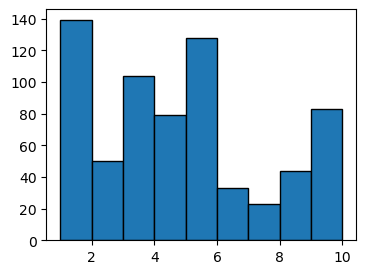

In [69]:
#c1=df['Clump_thickness'].value_counts()
plt.hist(df['Clump_thickness'],edgecolor='black',bins=9)
plt.rcParams['figure.figsize']=(5,3)
plt.show()

<Axes: xlabel='Clump_thickness', ylabel='count'>

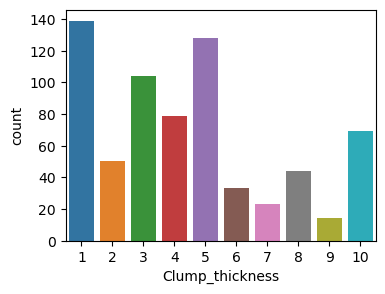

In [42]:
sns.countplot(x=df['Clump_thickness'])

In [43]:
df['Clump_thickness'].mean()

4.44216691068814

In [44]:
df['Clump_thickness'].median()

4.0

In [45]:
df['Clump_thickness'].skew()

0.587654236122398

In [48]:
import statistics as st
st.variance(df['Clump_thickness'])

7.956694417847774

In [49]:
st.stdev(df['Clump_thickness'])

2.820761318837128

In [50]:
df['Uniformity_Cell_Size'].value_counts()

1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64

<Axes: xlabel='Uniformity_Cell_Size', ylabel='count'>

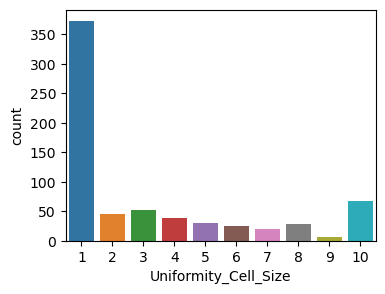

In [52]:
sns.countplot(x=df['Uniformity_Cell_Size'])

In [63]:
df.drop('Id',axis=1,inplace=True)

<Axes: >

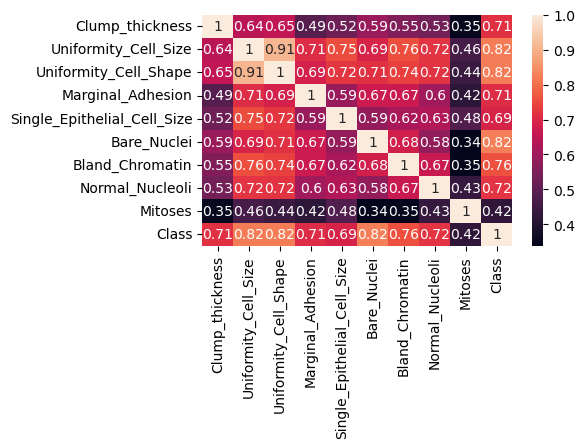

In [70]:
sns.heatmap(df.corr(),annot=True)

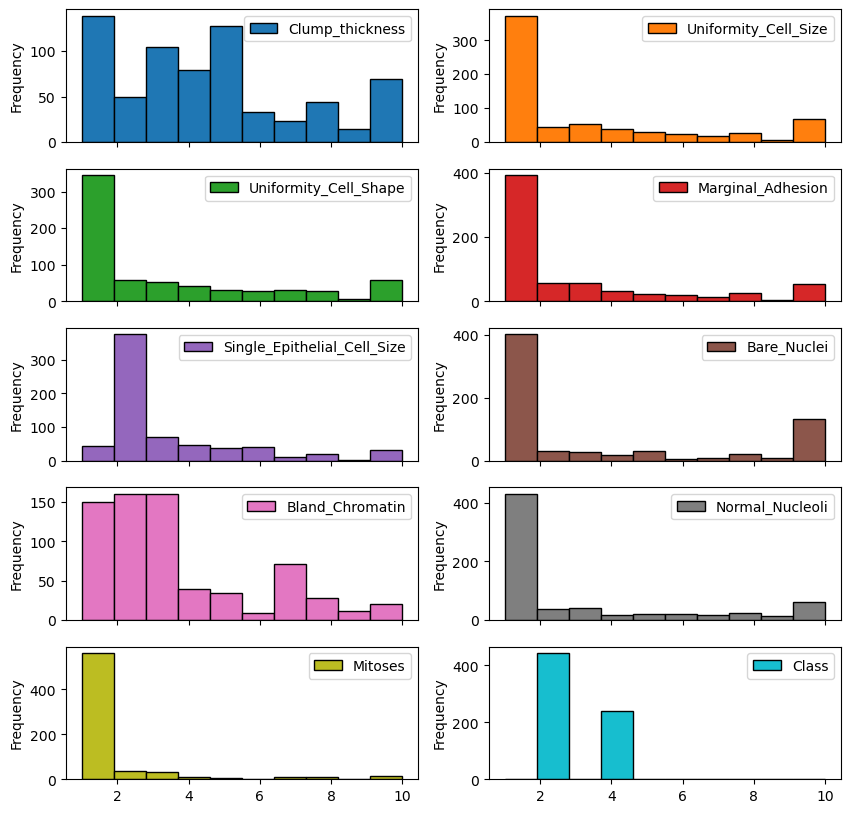

In [77]:
plt.rcParams['figure.figsize']=(10,10)
df.plot(kind='hist',subplots=True,layout=(5,2),edgecolor='black')
plt.show()

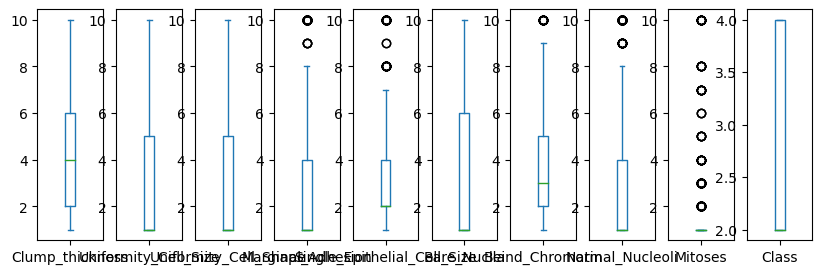

In [85]:
plt.rcParams['figure.figsize']=(10,3)
df.plot(kind='box',subplots=True,layout=(1,10))
plt.show()

In [92]:
Y = df.iloc[:,-1].values
X = df.iloc[:,:-1].values

In [93]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_new = sc.fit_transform(X)

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3,random_state=50)

In [95]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(478, 9)
(478,)
(205, 9)
(205,)


In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18,weights='uniform',algorithm='auto',metric='minkowski')
knn.fit(X_train,Y_train)
#by default k=5 but as it is shown in the graph that max accuracy is achieved by k=18-20, 1st try with default value then now we r trying wd k=18

KNeighborsClassifier(n_neighbors=18)

In [123]:
Y_pred = knn.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[132   0]
 [  3  70]]


In [125]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           2       0.98      1.00      0.99       132
           4       1.00      0.96      0.98        73

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.98       205
weighted avg       0.99      0.99      0.99       205



In [126]:
from sklearn.model_selection import cross_val_score
(cross_val_score(knn,X_train,Y_train,cv=5)).mean()

0.9624122807017544

In [127]:
(cross_val_score(knn,X_test,Y_test,cv=5)).mean()

0.9853658536585366

In [111]:
x=[]
y=[]
for i in range(1,35,2):
    knn=KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='auto',metric='minkowski')
    score=(cross_val_score(knn,X_train,Y_train,cv=5)).mean()
    x.append(i)
    y.append(score)

In [112]:
x

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]

In [115]:
y

[0.9414912280701755,
 0.9560745614035089,
 0.9540350877192983,
 0.9582675438596491,
 0.9582675438596491,
 0.9603508771929825,
 0.9644956140350878,
 0.9644956140350878,
 0.9666008771929825,
 0.9666008771929825,
 0.9623903508771929,
 0.9582236842105264,
 0.9561184210526316,
 0.9540350877192983,
 0.9540350877192983,
 0.9540350877192983,
 0.9519517543859649]

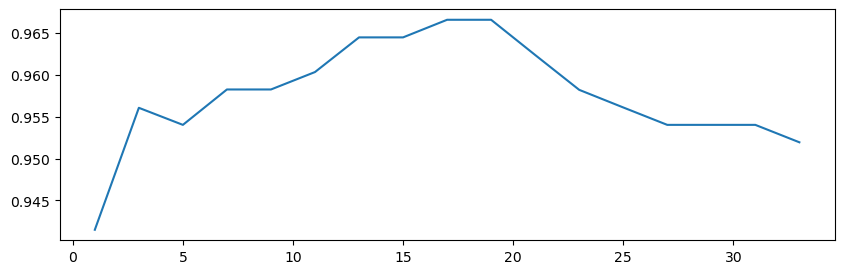

In [116]:
plt.plot(x,y),#max accuracy we can achieve when k=18-20

In [128]:
x1=[]
y1=[]
for i in range(1,35,2):
    knn= KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='auto',metric='minkowski')
    score=(cross_val_score(knn,X_test,Y_test,cv=5)).mean()
    x1.append(i)
    y1.append(score)

In [129]:
x1

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]

In [130]:
y1

[0.9804878048780488,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366]

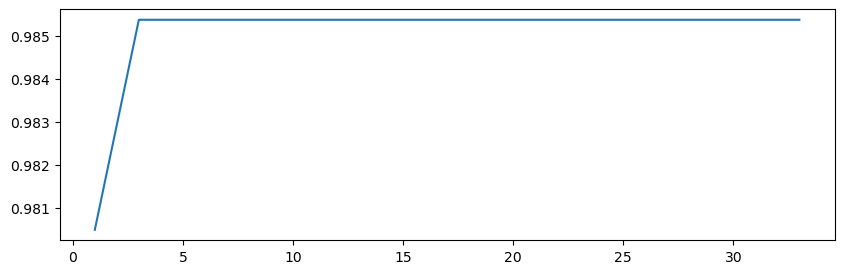

In [131]:
plt.plot(x1,y1)# from k=3to35 we can achieve max accuracy 

In [134]:
X_new.shape

(683, 9)

<Axes: >

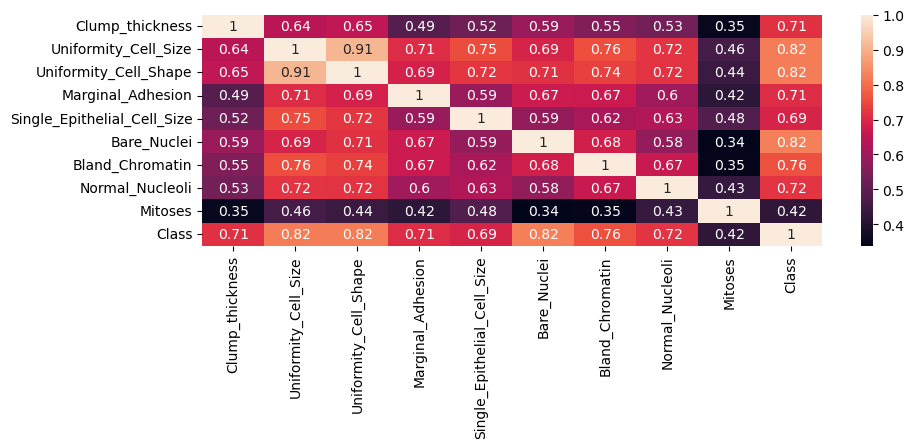

In [137]:
sns.heatmap(df.corr(),annot=True)

In [141]:
#categorical encoding
final_data = pd.get_dummies(df,drop_first=True)
final_data

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [142]:
Y_=final_data.iloc[:,-1].values
X_=final_data.iloc[:,:-1].values

In [153]:
X_

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [146]:
Y_

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [154]:
#ols method
import statsmodels.api as osi
X_out=X_[:,[0,1,2,3,4,5,6,7,8]]
ols = osi.OLS(endog=Y_,exog=X_out).fit()

In [155]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              971.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        13:48:13   Log-Likelihood:                         -787.23
No. Observations:                 683   AIC:                                      1592.
Df Residuals:                     674   BIC:                                      1633.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2157      0.013     16.873      0.000       0.191       0.241
x2            -0.0935      0.025     -3.720      0.000      -0.143      -0.044
x3             0.0160      0.025      0.633      0.527      -0.034       0.066
x4             0.0252      0.016      1.557      0.120      -0.007       0.057
x5             0.1980      0.020     10.038      0.000       0.159       0.237
x6             0.0551      0.013      4.249      0.000       0.030       0.081
x7             0.2004      0.019     10.461      0.000       0.163       0.238
x8             0.0020      0.015      0.135      0.893      -0.027       0.031
x9             0.0536      0.020      2.677      0.008       0.014       0.093
==============================================================================
Omnibus:                       85.083   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.964
Skew:                          -0.875   Prob(JB):                     1.99e-27
Kurtosis:                       4.120   Cond. No.                         13.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
X_out=X_[:,[0,1,2,3,4,5,6,8]]
ols = osi.OLS(endog=Y_,exog=X_out).fit()

In [158]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              1094.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        13:51:30   Log-Likelihood:                         -787.24
No. Observations:                 683   AIC:                                      1590.
Df Residuals:                     675   BIC:                                      1627.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2157      0.013     16.887      0.000       0.191       0.241
x2            -0.0931      0.025     -3.730      0.000      -0.142      -0.044
x3             0.0165      0.025      0.660      0.509      -0.033       0.066
x4             0.0254      0.016      1.572      0.116      -0.006       0.057
x5             0.1982      0.020     10.086      0.000       0.160       0.237
x6             0.0551      0.013      4.255      0.000       0.030       0.081
x7             0.2008      0.019     10.647      0.000       0.164       0.238
x8             0.0539      0.020      2.711      0.007       0.015       0.093
==============================================================================
Omnibus:                       85.102   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.078
Skew:                          -0.875   Prob(JB):                     1.88e-27
Kurtosis:                       4.123   Cond. No.                         12.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
X_out=X_[:,[0,1,3,4,5,6,8]]
ols = osi.OLS(endog=Y_,exog=X_out).fit()

In [160]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              1251.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        13:53:22   Log-Likelihood:                         -787.46
No. Observations:                 683   AIC:                                      1589.
Df Residuals:                     676   BIC:                                      1621.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2170      0.013     17.169      0.000       0.192       0.242
x2            -0.0820      0.018     -4.458      0.000      -0.118      -0.046
x3             0.0257      0.016      1.595      0.111      -0.006       0.057
x4             0.1992      0.020     10.170      0.000       0.161       0.238
x5             0.0567      0.013      4.456      0.000       0.032       0.082
x6             0.2016      0.019     10.716      0.000       0.165       0.239
x7             0.0541      0.020      2.723      0.007       0.015       0.093
==============================================================================
Omnibus:                       84.762   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.748
Skew:                          -0.871   Prob(JB):                     2.22e-27
Kurtosis:                       4.130   Cond. No.                         8.26
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
X_out=X_[:,[0,1,4,5,6,8]]
ols = osi.OLS(endog=Y_,exog=X_out).fit()

In [163]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              1456.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        13:54:13   Log-Likelihood:                         -788.75
No. Observations:                 683   AIC:                                      1589.
Df Residuals:                     677   BIC:                                      1617.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2157      0.013     17.084      0.000       0.191       0.241
x2            -0.0750      0.018     -4.194      0.000      -0.110      -0.040
x3             0.2010      0.020     10.265      0.000       0.163       0.239
x4             0.0625      0.012      5.123      0.000       0.039       0.086
x5             0.2081      0.018     11.314      0.000       0.172       0.244
x6             0.0587      0.020      2.983      0.003       0.020       0.097
==============================================================================
Omnibus:                       83.826   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.245
Skew:                          -0.853   Prob(JB):                     1.73e-27
Kurtosis:                       4.191   Cond. No.                         7.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
df.drop('Normal_Nucleoli',axis=1,inplace=True)

In [167]:
df.drop('Uniformity_Cell_Shape',axis=1,inplace=True)

In [169]:
df.drop('Marginal_Adhesion',axis=1,inplace=True)

In [174]:
X_drop=df.iloc[:,:-1].values

In [175]:
X_drop

array([[ 5.,  1.,  2.,  1.,  3.,  1.],
       [ 5.,  4.,  7., 10.,  3.,  1.],
       [ 3.,  1.,  2.,  2.,  3.,  1.],
       ...,
       [ 5., 10.,  7.,  3.,  8.,  2.],
       [ 4.,  8.,  3.,  4., 10.,  1.],
       [ 4.,  8.,  4.,  5., 10.,  1.]])

In [176]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_drop_new = sc.fit_transform(X_drop)

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_drop_new,Y_,test_size=0.3)

In [178]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [179]:
Y_pred1=lr.predict(X_test)

In [181]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred1)

array([[123,   1],
       [  4,  77]], dtype=int64)

In [183]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       124
           4       0.99      0.95      0.97        81

    accuracy                           0.98       205
   macro avg       0.98      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



In [189]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=5).mean()

0.9623464912280701

In [191]:
cross_val_score(lr,X_test,Y_test,cv=18).mean()

0.9764309764309763

In [192]:
df

,Clump_thickness,Uniformity_Cell_Size,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Mitoses,Class
0,5,1,2,1.0,3,1,2
1,5,4,7,10.0,3,1,2
2,3,1,2,2.0,3,1,2
3,6,8,3,4.0,3,1,2
4,4,1,2,1.0,3,1,2
...,...,...,...,...,...,...,...
694,3,1,3,2.0,1,1,2
695,2,1,2,1.0,1,1,2
696,5,10,7,3.0,8,2,4
697,4,8,3,4.0,10,1,4


In [3]:
df1=pd.read_csv('breast-cancer-wisconsin (1).csv')

In [4]:
df1.shape

(699, 11)

In [195]:
df1.drop('Id',axis=1,inplace=True)

In [200]:
df1['Bare_Nuclei']= pd.to_numeric(df1['Bare_Nuclei'],errors='coerce')

In [201]:
df1['Bare_Nuclei'].isna().sum()

16

In [204]:
df1.dropna(inplace=True)

In [205]:
df1.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [212]:
Ywd=df1.iloc[:,-1].values
Xwd=df1.iloc[:,:-1].values

In [213]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xwd_new = sc.fit_transform(Xwd)

In [215]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Xwd_new,Ywd,test_size=0.3)

In [217]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [218]:
Y_pred2 = lr.predict(X_test)

In [219]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred2)

array([[132,   3],
       [  2,  68]], dtype=int64)

In [221]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98       135
           4       0.96      0.97      0.96        70

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



In [228]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=18).mean()

0.9624089901867681

In [230]:
cross_val_score(lr,X_test,Y_test,cv=5).mean()

0.975609756097561